In [1]:
#步骤1：导入噪声日志

from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
filename = "sample_logs/jsonocel/1_Fuel_plane_2PE_incorrect.jsonocel"
ocel = ocel_import_factory.apply(filename)
print("噪声日志导入成功! 内容如下：")
print(ocel)

噪声日志导入成功! 内容如下：
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['baggage', 'plane'], act_attr={'Fuel plane': ['start_timestamp'], 'Check-in': ['start_timestamp'], 'Load cargo': ['start_timestamp'], 'Lift off': ['start_timestamp'], 'Unload': ['start_timestamp'], 'Clean': ['start_timestamp'], 'Pick up @ dest': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1', 'b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Load cargo, Timestamp: 2023-03-03 16:00

提取流程执行成功！
Number of process executions: 2
[{7, 8, 9, 10, 11, 12, 13, 14, 15}, {0, 1, 2, 3, 4, 5, 6}]
流程执行 1 如图


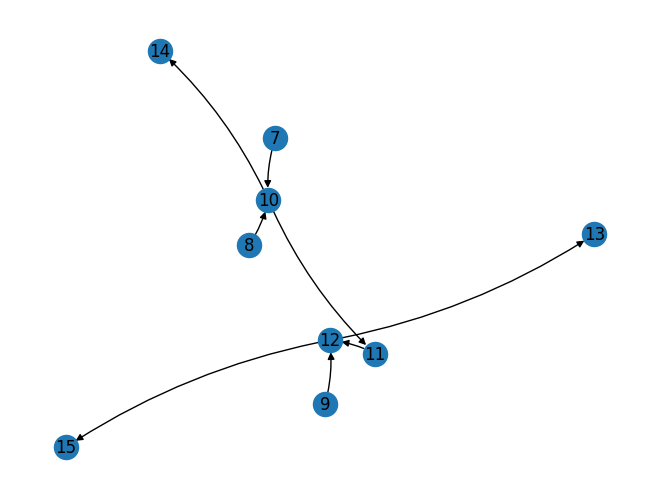

流程执行 2 如图


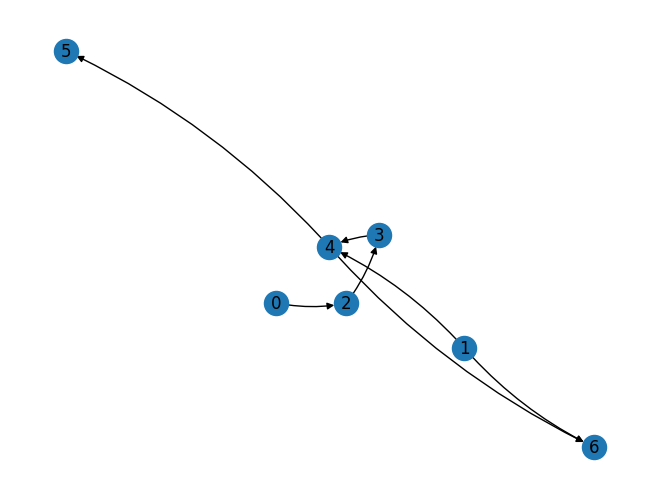

In [2]:
#步骤2：提取流程执行

print("提取流程执行成功！")
print("Number of process executions: "+str(len(ocel.process_executions)))
print(ocel.process_executions)
# print("Events of the first process execution: "+str(ocel.process_executions[0]))
# print("Objects of the first process execution: "+str(ocel.process_execution_objects[0]))
import networkx as nx
import matplotlib.pyplot as plt
# graph_1 = ocel.get_process_execution_graph(0)
# pos = nx.spring_layout(graph_1)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_1, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行1如图")
# plt.show()
# graph_2 = ocel.get_process_execution_graph(1)
# pos = nx.spring_layout(graph_2)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_2, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行2如图")
# plt.show()
# graph_3 = ocel.get_process_execution_graph(2)
# pos = nx.spring_layout(graph_3)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_3, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行3如图")
# plt.show()
pe_graph = []
for i in range(len(ocel.process_executions)):
    graph = ocel.get_process_execution_graph(i)
    pe_graph.append(graph)
for i in range(len(pe_graph)):
    pos = nx.spring_layout(pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"如图")
    plt.show()

流程执行 1 删除跨层冗余依赖成功！如图：


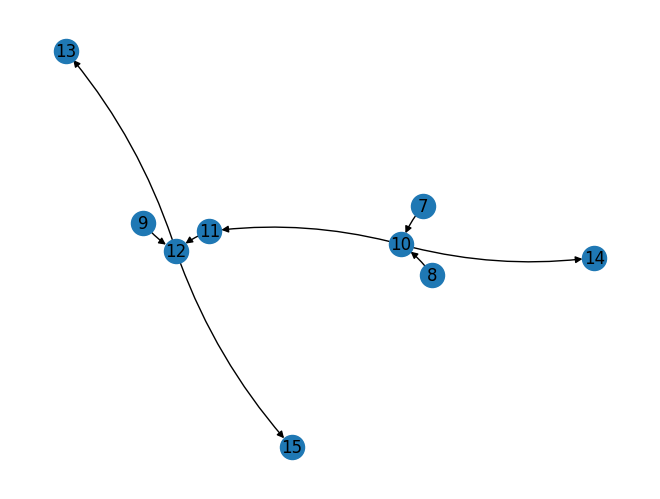

流程执行 2 删除跨层冗余依赖成功！如图：


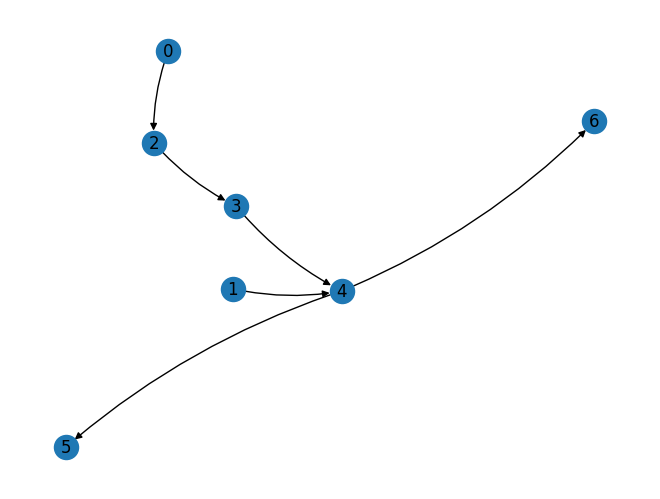

In [3]:
#步骤3：删除跨层冗余依赖

def transitive_reduction(G):
    # Ensure G is a DAG
    if not nx.is_directed_acyclic_graph(G):
        msg = "Directed Acyclic Graph required for transitive_reduction"
        raise nx.NetworkXError(msg)
    
    TR = nx.DiGraph()
    TR.add_nodes_from(G.nodes())
    descendants = {}
    check_count = dict(G.in_degree)
    
    for u in G:
        u_nbrs = set(G[u])
        for v in G[u]:
            if v in u_nbrs:
                if v not in descendants:
                    descendants[v] = {y for x, y in nx.dfs_edges(G, v)}
                u_nbrs -= descendants[v]
            check_count[v] -= 1
            if check_count[v] == 0:
                del descendants[v]
        TR.add_edges_from((u, v) for v in u_nbrs)
    
    return TR
# re_graph = transitive_reduction(graph_1)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行1删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_2)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行2删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_3)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行3删除跨层冗余依赖成功！如图：")
# plt.show()
import matplotlib.pyplot as plt
reduction_pe_graph = []
for i in range(len(pe_graph)):
    re_graph = transitive_reduction(pe_graph[i])
    reduction_pe_graph.append(re_graph)
for i in range(len(reduction_pe_graph)):
    pos = nx.spring_layout(reduction_pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(reduction_pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"删除跨层冗余依赖成功！如图：")
    plt.show()

In [4]:

#步骤4：按梯队划分绑定序列-第1步-获取分组情况

def get_no_incoming_nodes(G):
    """ Return a list of nodes with no incoming edges in the graph G """
    return [node for node in G.nodes if G.in_degree(node) == 0]

def layer_nodes(G):
    """ Return a list of layers of nodes with no incoming edges in the graph G """
    final = []
    while G.nodes:
        current_layer = get_no_incoming_nodes(G)
        final.append(current_layer)
        G.remove_nodes_from(current_layer)
    return final
# re_graph = transitive_reduction(graph_1)
# layered_nodes = layer_nodes(re_graph.copy())
# print("流程执行1按梯队划分绑定序列成功！分组情况如下：")
# print("Layered Nodes:", layered_nodes)
layered_nodes_list = []
for i in range(len(reduction_pe_graph)):
    layered_nodes = layer_nodes(reduction_pe_graph[i].copy())
    layered_nodes_list.append(layered_nodes)
for i in range(len(layered_nodes_list)):
    print("流程执行",i+1,"按梯队划分绑定序列成功！分组情况如下：")
    print("Layered Nodes:", layered_nodes_list[i])

流程执行 1 按梯队划分绑定序列成功！分组情况如下：
Layered Nodes: [[7, 8, 9], [10], [11, 14], [12], [13, 15]]
流程执行 2 按梯队划分绑定序列成功！分组情况如下：
Layered Nodes: [[0, 1], [2], [3], [4], [5, 6]]


In [5]:
#步骤4：按梯队划分绑定序列-第2步-获取OCEL数据

#手动添加：噪声日志部分提取内容
ocel_log = """
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['baggage', 'plane'], act_attr={'Fuel plane': ['start_timestamp'], 'Check-in': ['start_timestamp'], 'Load cargo': ['start_timestamp'], 'Lift off': ['start_timestamp'], 'Unload': ['start_timestamp'], 'Clean': ['start_timestamp'], 'Pick up @ dest': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1', 'b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Load cargo, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Lift off, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Unload, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b2', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b1', 'b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Fuel plane, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Check-in, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b3'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9, Event 9 - Activity: Check-in, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b4'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10, Event 10 - Activity: Load cargo, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p2', 'b3'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11, Event 11 - Activity: Lift off, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12, Event 12 - Activity: Unload, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b4', 'p2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13, Event 13 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14, Event 14 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b3'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15, Event 15 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b4'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'b1': Object b1 - Type: baggage, OVMAP: {}, 'b2': Object b2 - Type: baggage, OVMAP: {}, 'b3': Object b3 - Type: baggage, OVMAP: {}, 'b4': Object b4 - Type: baggage, OVMAP: {}, 'p1': Object p1 - Type: plane, OVMAP: {}, 'p2': Object p2 - Type: plane, OVMAP: {}}, obj_event_mapping={'p1': [0, 2, 3, 4, 5], 'b1': [1, 6], 'b2': [1, 4, 6], 'p2': [7, 10, 11, 12, 13], 'b3': [8, 10, 14], 'b4': [9, 12, 15]})), graph=EventGraph(eog=<networkx.classes.digraph.DiGraph object at 0x0000024F2A11A148>), parameters={'obj_names': ['baggage', 'plane'], 'val_names': ['sevent_tevent_aevent_revent_tevent__event_tevent_ievent_mevent_eevent_sevent_tevent_aevent_mevent_p'], 'act_name': 'event_activity', 'time_name': 'event_timestamp', 'sep': ','})"""
import re
match = re.search(r'raw=RawObjectCentricData\((.*?)\)\)', ocel_log, re.DOTALL)
if match:
    raw_data = match.group(0)
#     print("Extracted Raw Data:")
#     print(raw_data)
else:
    print("No match found for raw=RawObjectCentricData")
import re
from collections import OrderedDict

# 假设 raw_data 是提取到的 Raw Data 部分
# raw_data = "raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Lift off, Timestamp: 2023-02-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 2, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Load cargo, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Unload, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'b2', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'b1': Object b1 - Type: baggage, OVMAP: {}, 'b2': Object b2 - Type: baggage, OVMAP: {}, 'p1': Object p1 - Type: plane, OVMAP: {}}, obj_event_mapping={'p1': [0, 3, 4, 5, 6], 'b1': [1, 4, 5, 8], 'b2': [2, 5, 7]}))"

# 定义正则表达式来匹配每个事件的数据
event_pattern = re.compile(r'\((\d+), Event \d+ - Activity: (.*?), Timestamp: .*?, OMAP: (\[.*?\]), VMAP: .*?\)')

# 初始化一个字典来保存结果
events_dict = {}

# 使用正则表达式查找所有匹配的事件
matches = event_pattern.findall(raw_data)

# 定义对象类型和对应的对象
object_types = {
    'plane': ['p1','p2'],
    'baggage': ['b1', 'b2', 'b3', 'b4']
}

# 处理每个匹配的事件并将其保存到字典中
for match in matches:
    event_index = int(match[0])
    activity = match[1]
    omap = eval(match[2])  # 将OMAP字符串转换为实际的列表
    categorized_objects = {}
    for obj_type, objects in object_types.items():
        categorized_objects[obj_type] = [obj for obj in omap if obj in objects]
    events_dict[event_index] = [activity, categorized_objects]

# 打印结果
print("完整日志 事件活动绑定匹配成功！内容如下：")
print(events_dict)

完整日志 事件活动绑定匹配成功！内容如下：
{0: ['Fuel plane', {'plane': ['p1'], 'baggage': []}], 1: ['Check-in', {'plane': [], 'baggage': ['b1', 'b2']}], 2: ['Load cargo', {'plane': ['p1'], 'baggage': []}], 3: ['Lift off', {'plane': ['p1'], 'baggage': []}], 4: ['Unload', {'plane': ['p1'], 'baggage': ['b2']}], 5: ['Clean', {'plane': ['p1'], 'baggage': []}], 6: ['Pick up @ dest', {'plane': [], 'baggage': ['b1', 'b2']}], 7: ['Fuel plane', {'plane': ['p2'], 'baggage': []}], 8: ['Check-in', {'plane': [], 'baggage': ['b3']}], 9: ['Check-in', {'plane': [], 'baggage': ['b4']}], 10: ['Load cargo', {'plane': ['p2'], 'baggage': ['b3']}], 11: ['Lift off', {'plane': ['p2'], 'baggage': []}], 12: ['Unload', {'plane': ['p2'], 'baggage': ['b4']}], 13: ['Clean', {'plane': ['p2'], 'baggage': []}], 14: ['Pick up @ dest', {'plane': [], 'baggage': ['b3']}], 15: ['Pick up @ dest', {'plane': [], 'baggage': ['b4']}]}


In [6]:
#步骤4：按梯队划分绑定序列-第3步-获取绑定序列

def format_layered_nodes(layered_nodes, events_dict):
    formatted_nodes = []

    for layer in layered_nodes:
        layer_list = []
        for node in layer:
            if node in events_dict:
                activity_name = events_dict[node][0]
                objects_map = events_dict[node][1]
                layer_list.append((activity_name, objects_map))
            else:
                print(f"Event index {node} not found in events_dict.")
        formatted_nodes.append(layer_list)

    return formatted_nodes
# formatted_nodes = format_layered_nodes(layered_nodes, events_dict)
# print("流程执行1 绑定序列获取成功！内容如下：")
# print(formatted_nodes)
formatted_nodes_list = []
for i in range(len(layered_nodes_list)):
    formatted_nodes = format_layered_nodes(layered_nodes_list[i], events_dict)
    formatted_nodes_list.append(formatted_nodes)
for i in range(len(formatted_nodes_list)):
    print("流程执行",i+1, "绑定序列获取成功！内容如下：")
    print(formatted_nodes_list[i])

流程执行 1 绑定序列获取成功！内容如下：
[[('Fuel plane', {'plane': ['p2'], 'baggage': []}), ('Check-in', {'plane': [], 'baggage': ['b3']}), ('Check-in', {'plane': [], 'baggage': ['b4']})], [('Load cargo', {'plane': ['p2'], 'baggage': ['b3']})], [('Lift off', {'plane': ['p2'], 'baggage': []}), ('Pick up @ dest', {'plane': [], 'baggage': ['b3']})], [('Unload', {'plane': ['p2'], 'baggage': ['b4']})], [('Clean', {'plane': ['p2'], 'baggage': []}), ('Pick up @ dest', {'plane': [], 'baggage': ['b4']})]]
流程执行 2 绑定序列获取成功！内容如下：
[[('Fuel plane', {'plane': ['p1'], 'baggage': []}), ('Check-in', {'plane': [], 'baggage': ['b1', 'b2']})], [('Load cargo', {'plane': ['p1'], 'baggage': []})], [('Lift off', {'plane': ['p1'], 'baggage': []})], [('Unload', {'plane': ['p1'], 'baggage': ['b2']})], [('Clean', {'plane': ['p1'], 'baggage': []}), ('Pick up @ dest', {'plane': [], 'baggage': ['b1', 'b2']})]]


OCPN构造成功！可视化如下：


D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\util.py:49: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  stream = df.to_dict('r')


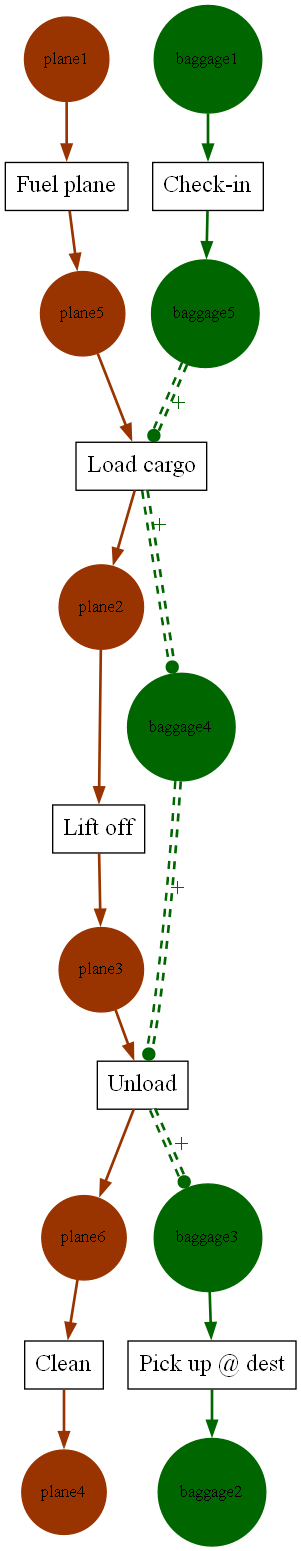

{(t)Unload->(p)baggage3, (p)baggage3->(t)Pick up @ dest, (t)Check-in->(p)baggage5, (p)plane1->(t)Fuel plane, (t)Lift off->(p)plane3, (p)plane3->(t)Unload, (t)Load cargo->(p)plane2, (p)plane2->(t)Lift off, (t)Clean->(p)plane4, (t)Fuel plane->(p)plane5, (p)plane5->(t)Load cargo, (t)Unload->(p)plane6, (p)plane6->(t)Clean, (t)Load cargo->(p)baggage4, (p)baggage4->(t)Unload, (p)baggage5->(t)Load cargo, (t)Pick up @ dest->(p)baggage2, (p)baggage1->(t)Check-in}


In [7]:
#步骤5：构造标准OCPN模型，每次库所名称都会变化！！！
from ocpa.algo.conformance.precision_and_fitness import evaluator as quality_measure_factory
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
filename = "sample_logs/jsonocel/Fuel_plane_2PE_correct.jsonocel"
ocel = ocel_import_factory.apply(filename)
ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})
print("OCPN构造成功！可视化如下：")
gviz=ocpn_vis_factory.apply(ocpn)
ocpn_vis_factory.view(gviz)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn), "oc_petri_net.png")
# print(ocpn.places)
# print(ocpn.transitions)
print(ocpn.arcs)

In [8]:
#步骤6：构造开始标识-第1步-确定开始库所和结束库所

###开始库所

def get_initial_places(ocpn):
    initial_places = {}
    for place in ocpn.places:
        if place.initial:
            if place.object_type not in initial_places:
                initial_places[place.object_type] = []
            initial_places[place.object_type].append(place.name)
    return initial_places

initial_places = get_initial_places(ocpn)
print("OCPN的开始库所获取成功！内容如下：")
print(initial_places)

###结束库所

def get_final_places(ocpn):
    final_places = {}
    for place in ocpn.places:
        if place.final:
            if place.object_type not in final_places:
                final_places[place.object_type] = []
            final_places[place.object_type].append(place.name)
    return final_places

final_places = get_final_places(ocpn)
print("OCPN的结束库所获取成功！内容如下：")
print(final_places)

OCPN的开始库所获取成功！内容如下：
{'plane': ['plane1'], 'baggage': ['baggage1']}
OCPN的结束库所获取成功！内容如下：
{'plane': ['plane4'], 'baggage': ['baggage2']}


In [9]:
#步骤6：构造开始标识-第2步-构造开始标识
def extract_objects_from_bindings(formatted_nodes):
    objects_dict = {}

    for layer in formatted_nodes:
        for binding in layer:
            _, objects = binding
            for obj_type, obj_list in objects.items():
                if obj_type not in objects_dict:
                    objects_dict[obj_type] = set()
                objects_dict[obj_type].update(obj_list)

    # 转换集合为列表形式
    for obj_type in objects_dict:
        objects_dict[obj_type] = list(objects_dict[obj_type])

    return objects_dict

# 提取对象
# objects_dict = extract_objects_from_bindings(formatted_nodes)

# # 输出结果
# print("流程执行1 绑定中涉及的各类型及相应对象的内容如下：")
# print(objects_dict)

# 将token放入开始库所，构造token列表 [(plane1,p1),(baggage1,b1),(baggage1,b2)]
def generate_initial_marking(initial_places, objects_dict):
    initial_marking = []
    for obj_type, initial_objs in initial_places.items():
        if obj_type in objects_dict:
            for initial_obj in initial_objs:
                for obj in objects_dict[obj_type]:
                    initial_marking.append((initial_obj, obj))
    return initial_marking
# initial_marking = generate_initial_marking(initial_places, objects_dict)
# # print(len(initial_marking))
# print("流程执行1 开始标识获取成功！内容如下：")
# print(initial_marking)

In [10]:
#步骤7：重演-第1步-提取变迁的前集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取前集库所的函数
def get_predecessor_places(arcs, transition):
    predecessor_places = []
    for arc in arcs:
        if arc.target == transition:
            predecessor_places.append(arc.source)
    return predecessor_places

In [11]:
#步骤7：重演-第2步-提取变迁的后集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取后继库所的函数
def get_postdecessor_places(arcs, transition):
    postdecessor_places = []
    for arc in arcs:
        if arc.source == transition:
            postdecessor_places.append(arc.target)
    return postdecessor_places

In [12]:
#步骤7：重演-第3步-移除结束库所的Token
def remove_tokens_from_final_places(current_marking, final_places_dict):  
    consumed = []  
    updated_marking = []  
    consumed_count = 0  # 初始化计数器  
  
    # final_places_dict 是一个字典，键是库所类型，值是结束库所名称的列表  
    final_places = {place_name for place_type, names in final_places_dict.items() for place_name in names}  
  
    # 遍历当前标识中的所有Token  
    for place_name, token in current_marking:  
        if place_name in final_places:  
            consumed.append(token)  
            consumed_count += 1  # 更新计数器  
        else:  
            updated_marking.append((place_name, token))  
  
    return updated_marking, consumed, consumed_count  

In [13]:
#步骤8：各种函数
# 判断变迁可以发生
def is_transition_enabled(transition, pre_places, current_marking, binding_objects):  
    current_places = {p for p, _ in current_marking}  
    current_tokens = set(current_marking)  
      
    for place in pre_places:  
        place_name = place.name
        place_type = place.object_type 
#         if place_name not in current_places:  
#             return False  # 库所不在current_marking中   
          
        # 检查是否存在与库所类型匹配的对象类型  
        matching_objects_found = False  
        for obj_type, obj_list in binding_objects.items():  
            if obj_type == place_type:  
                matching_objects_found = True  
                for obj in obj_list:  
                    required_token = (place_name, obj)  
                    if required_token not in current_tokens:  
                        return False  # 缺少所需的token  
          
        # 如果没有找到匹配的对象类型，也返回False  
        if not matching_objects_found:  
            return False  # 没有找到与库所类型匹配的对象类型  
      
    return True
#更新标识

def update_marking(current_marking, pre_places, post_places, objects):
    # 移除前集库所及其所有绑定对象组成的元组
    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        # 从 current_marking 中移除所有对应的 Token
        current_marking = [token for token in current_marking if not (token[0] == place_name and token[1] in objects.get(place_type, []))]
    
    # 将后继库所及其绑定对象组成的元组添加到 current_marking 中
    for place in post_places:
        place_name = place.name
        place_type = place.object_type
        
        # 添加 Token
        if place_type in objects:
            for obj in objects[place_type]:
                current_marking.append((place_name, obj))
                
    return current_marking





#添加缺失Token

# def add_missing_token(pre_places, current_marking, binding_objects):
#     # 检查并添加缺失的前集库所绑定对象
#     for place in pre_places:
#         place_name = place.name
#         place_type = place.object_type
        
#         # 找到与 place_type 匹配的对象
#         if place_type in binding_objects:
#             required_tokens = set((place_name, obj) for obj in binding_objects[place_type])
            
#             # 添加缺失的 Token
#             for token in required_tokens:
#                 if token not in current_marking:
#                     current_marking.append(token)
                    
#     return current_marking
def add_missing_token(pre_places, current_marking, binding_objects):
    missing_tokens = []

    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        if place_type in binding_objects:
            required_tokens = set((place_name, obj) for obj in binding_objects[place_type])
            
            for token in required_tokens:
                if token not in current_marking:
                    current_marking.append(token)
                    missing_tokens.append(token)  # 记录缺失的Token
                    
    return current_marking, missing_tokens

In [14]:
# #步骤9：重演
    
def apply_bindings_to_ocpn(bindings, ocpn, initial_marking):
    # 定义计数器
    produced = len(initial_marking)
    consumed = 0
    missing = 0
    remaining = 0
    current_marking = initial_marking
    #构造无法使能变迁集合
    unabled_transition = set()
    added_tokens_info = []  # 存储所有添加的缺失Token

    # 判断变迁是否可以发生
    for binding_group in bindings:
        for binding in binding_group:
            if isinstance(binding, tuple) and len(binding) == 2:
                activity, objects = binding
                transition = find_transition_by_label(ocpn.transitions, activity)
                if transition is None:
                    print("No Transition")
                    continue

                pre_places = get_predecessor_places(ocpn.arcs, transition)
                if is_transition_enabled(transition, pre_places, current_marking, objects):
                    # 变迁可以发生
                    consumed += sum(len(v) for v in objects.values())
                    produced += sum(len(v) for v in objects.values())
                    missing += 0

                    post_places = get_postdecessor_places(ocpn.arcs, transition)
                    current_marking = update_marking(current_marking, pre_places, post_places, objects)
                    print(f"{activity} 发生后当前标识为：", current_marking)
                else:
                    # 变迁无法发生，尝试添加缺失的Token
                    current_marking, missing_tokens = add_missing_token(pre_places, current_marking, objects)
                    if missing_tokens:
                        added_tokens_info.append({activity: missing_tokens})

                    print(f"{activity} 不可发生，添加缺失Token后的当前标识为：", current_marking)

                    # 再次检查变迁是否可以发生
                    if is_transition_enabled(transition, pre_places, current_marking, objects):
                        #将无法使能变迁添加到集合中
                        unabled_transition.add(transition)
                        consumed += sum(len(v) for v in objects.values())
                        produced += sum(len(v) for v in objects.values())
                        missing += len(missing_tokens)

                        post_places = get_postdecessor_places(ocpn.arcs, transition)
                        current_marking = update_marking(current_marking, pre_places, post_places, objects)
                        print(f"{activity} 发生后当前标识为：", current_marking)
                    else:
                        print(f"{activity} 仍不可发生")

#     print("当前标识为：", current_marking)
    final_places_dict = get_final_places(ocpn)
#     print("结束库所为：", final_places_dict)
    current_marking = remove_tokens_from_final_places(current_marking, final_places_dict)
    consumed_count = current_marking[-1]
    consumed += consumed_count
#     print("移除Token后，当前标识为：", current_marking)
    if current_marking:
        remaining += len(current_marking[0])

    print("produced:", produced)
    print("consumed:", consumed)
    print("missing:", missing)
    print("remaining:", remaining)
    
    #输出无法使能变迁集合
#     print("无法使能的变迁集合:", unabled_transition)
    #输出添加的缺失Token信息
#     print("添加的缺失Token信息:", added_tokens_info)
    
    return produced, consumed, missing, remaining, unabled_transition, added_tokens_info #输出结果是元组

In [18]:
#步骤10：加入数据
# token_result_1 = apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking)
# print(type(apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking))) #元组
token_result_list = []
for i in range(len(formatted_nodes_list)):
    objects_dict = extract_objects_from_bindings(formatted_nodes_list[i])
#     print("流程执行",i+1,"绑定中涉及的各类型及相应对象的内容如下：")
#     print(objects_dict)
    initial_marking = generate_initial_marking(initial_places, objects_dict)
#     print("流程执行",i+1,"开始标识获取成功！内容如下：")
#     print(initial_marking)
    token_result = apply_bindings_to_ocpn(formatted_nodes_list[i],ocpn,initial_marking)
#     print(token_result)
    token_result_list.append(token_result)
# print(token_result_list)

import csv  
  
def extract_all_transitions_tokens(process_list):  
    results = []  
    for index, (_, _, _, _, transitions, token_info_dicts) in enumerate(process_list, start=1):  
        for transition in transitions:  
            transition_str = str(transition)  
            for token_dict in token_info_dicts:  
                if transition_str in token_dict:  
                    tokens = token_dict[transition_str]  # 提取与变迁对应的所有token  
                    for token in tokens:  # 遍历所有token  
                        results.append((index, transition_str, token))  
    return results
  
# 调用函数并获取结果  
results = extract_all_transitions_tokens(token_result_list)  
  
# 写入CSV文件  
with open('plane_unfitting_pe.csv', 'w', newline='', encoding='utf-8') as file:  
    writer = csv.writer(file)  
    # 写入表头  
    writer.writerow(['流程执行序号', '无法使能变迁', '添加缺失Token信息'])  
    # 写入结果  
    writer.writerows(results)  
  
print("偏差结果已写入CSV文件。")


def cal_batch(token_result_list):
    pre_top = 0 
    pre_bot = 0
    post_top = 0
    post_bot = 0
    for i in range(len(token_result_list)):
        pre_top += token_result_list[i][2]
        pre_bot += token_result_list[i][1]
        post_top += token_result_list[i][3]
        post_bot += token_result_list[i][0]
    return pre_top,pre_bot,post_top,post_bot
result = cal_batch(token_result_list)
calculate_ratio_pre = result[0]/result[1]
calculate_ratio_post = result[2]/result[3]
fitness = (1/2)*(1-calculate_ratio_pre) + (1/2)*(1-calculate_ratio_post)
print("生成的Token总数:消耗的Token总数:缺失的Token总数:剩余的Token总数=",result[3],result[1],result[0],result[2],)
print("拟合度：",fitness)

def unabled_transitions_total_tokens(bindings, ocpn, initial_marking, unabled_transition):
    transition_info = {}

    # 遍历无法使能变迁集合
    for transition in unabled_transition:
        pre_places = get_predecessor_places(ocpn.arcs, transition)
#         print(transition,"前集库所",pre_places)
        transition_name = transition.name
        transition_info[transition_name] = []

        # 遍历绑定序列
        for binding_group in bindings:
            for binding in binding_group:
                if isinstance(binding, tuple) and len(binding) == 2:
                    activity, objects = binding
                    if activity == transition_name:
                        for place in pre_places:
                            place_name = place.name
                            place_type = place.object_type
                            for obj_type, obj_list in objects.items():
                                if obj_type == place_type:
                                    for obj in obj_list:
                                        transition_info[transition_name].append((place_name, obj))

    return transition_info
def calculate_token_ratio(total_tokens, missing_tokens):
    # 将缺失Token列表合并为一个字典
    combined_missing_tokens = {}
    for missing in missing_tokens:
        for key, value in missing.items():
            if key in combined_missing_tokens:
                combined_missing_tokens[key].extend(value)
            else:
                combined_missing_tokens[key] = value

    # 计算比率
    token_ratios = {}
    for key, total in total_tokens.items():
        missing = combined_missing_tokens.get(key, [])
        total_count = len(total)
        missing_count = len(missing)
        ratio = (total_count - missing_count) / total_count if total_count != 0 else 0
        token_ratios[key] = round(ratio,2)

    return token_ratios

for i in range(len(token_result_list)):
    #获取无法使能变迁
    unabled_transition = token_result_list[i][4] #{Lift off, Unload}
#     print("流程执行",i+1,"未使能变迁如下：")
#     print(unabled_transition)
    #获取每个无法使能变迁的总Token
    unabled_transitions_total_tokens_num = unabled_transitions_total_tokens(formatted_nodes_list[i], ocpn, initial_marking, unabled_transition)
#     print("未使能变迁的总Token",unabled_transitions_total_tokens_num)
    #获取每个无法使能变迁的缺失重补Token
    unabled_transition_missing_token = token_result_list[i][5] #[{'Lift off': [('plane3', 'p1')]}, {'Unload': [('baggage2', 'b2')]}]
#     print("未使能变迁的缺失Token",unabled_transition_missing_token)
    ratios = calculate_token_ratio(unabled_transitions_total_tokens_num, unabled_transition_missing_token)
    print("未使能变迁的正确通过对象比例:", ratios)


Fuel plane 发生后当前标识为： [('baggage1', 'b3'), ('baggage1', 'b4'), ('plane5', 'p2')]
Check-in 发生后当前标识为： [('baggage1', 'b4'), ('plane5', 'p2'), ('baggage5', 'b3')]
Check-in 发生后当前标识为： [('plane5', 'p2'), ('baggage5', 'b3'), ('baggage5', 'b4')]
Load cargo 发生后当前标识为： [('baggage5', 'b4'), ('plane2', 'p2'), ('baggage4', 'b3')]
Lift off 发生后当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('plane3', 'p2')]
Pick up @ dest 不可发生，添加缺失Token后的当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('plane3', 'p2'), ('baggage3', 'b3')]
Pick up @ dest 发生后当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('plane3', 'p2'), ('baggage2', 'b3')]
Unload 不可发生，添加缺失Token后的当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('plane3', 'p2'), ('baggage2', 'b3'), ('baggage4', 'b4')]
Unload 发生后当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('baggage2', 'b3'), ('baggage3', 'b4'), ('plane6', 'p2')]
Clean 发生后当前标识为： [('baggage5', 'b4'), ('baggage4', 'b3'), ('baggage2', 'b3'), ('baggage3', 'b4'), ('plane4', 'p2')]
Pick up @ dest 发生后当前标识为： 

流程执行 1 未使能变迁如下：
{Pick up @ dest, Unload}
Pick up @ dest 前集库所 [baggage3]
Unload 前集库所 [plane3, baggage4]
未使能变迁的总Token {'Pick up @ dest': [('baggage3', 'b3'), ('baggage3', 'b4')], 'Unload': [('plane3', 'p2'), ('baggage4', 'b4')]}
未使能变迁的缺失Token [{'Pick up @ dest': [('baggage3', 'b3')]}, {'Unload': [('baggage4', 'b4')]}]
未使能变迁的正确通过对象比例: {'Pick up @ dest': 0.5, 'Unload': 0.5}
流程执行 2 未使能变迁如下：
{Unload, Pick up @ dest}
Unload 前集库所 [plane3, baggage4]
Pick up @ dest 前集库所 [baggage3]
未使能变迁的总Token {'Unload': [('plane3', 'p1'), ('baggage4', 'b2')], 'Pick up @ dest': [('baggage3', 'b1'), ('baggage3', 'b2')]}
未使能变迁的缺失Token [{'Unload': [('baggage4', 'b2')]}, {'Pick up @ dest': [('baggage3', 'b1')]}]
未使能变迁的正确通过对象比例: {'Unload': 0.5, 'Pick up @ dest': 0.5}
